In [1]:
import pandas as pd
print(pd. __version__)
from sklearn.utils import shuffle

df = pd.read_pickle('https://pandora.infn.it/public/20c12c/dl/dataset_pol_vbs_full2018v9_VBS_WW_2j_SF_dnn_SigBkg.pkl')
pd.set_option('display.max_columns', None)

df['notLL'] = df['isTT'] + df['isMIX']
df['notTT'] = df['isLL'] + df['isMIX']

df_SvB = df[((df['isTT'] + df['isMIX'] + df['isLL']) == 0) & ((df['isVBS'] + df['isBKG']) == 1)]
df_SvB

1.3.5


,CleanJet_eta_1,CleanJet_eta_2,CleanJet_phi_1,CleanJet_phi_2,CleanJet_pt_1,CleanJet_pt_2,Lepton_eta_1,Lepton_eta_2,Lepton_phi_1,Lepton_phi_2,Lepton_pt_1,Lepton_pt_2,Rpt,Zepp_l1,Zepp_l2,Zepp_ll,detajj,detall,dphijj,dphilep1jet1,dphilep1jet2,dphilep1jj,dphilep2jet1,dphilep2jet2,dphilep2jj,dphill,dphilljet,dphilljetjet,dphillmet,dphilmet1,dphilmet2,dr_l1j1,dr_l1j2,dr_l2j1,dr_l2j2,drll,ht,m2ljj30,mT2,mTi,m_l1j1,m_l1j2,m_l2j1,m_l2j2,mcoll,mcollWW,mjj,mll,mtw1,mtw2,phi_miss,proxyW_l1,proxyW_l2,pt_miss,ptll,recoil,yll,isLL,isMIX,isTT,isBKG,isVBS,notLL,notTT
0,-2.491211,2.557617,-0.833008,-2.407715,41.112770,37.595566,-1.908936,-2.227051,2.981934,1.035400,30.197708,29.706676,0.580383,-1.942139,-2.260254,2.101196,5.048828,0.318115,1.574707,2.468244,0.893537,1.725722,1.868408,2.840070,2.610930,1.946533,2.853719,2.686944,0.380644,1.341866,0.604667,3.859122,6.999886,1.886990,5.894751,1.972356,176.541458,696.423218,16.370735,136.512833,70.045670,312.242981,57.436062,368.595947,81.873001,189.282990,490.984894,50.438808,42.081768,19.989012,1.640068,85.886177,93.355484,37.928745,33.704769,70.344597,-2.066700,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-2.764648,-0.195984,0.152679,3.006836,496.834412,445.171173,1.642822,1.313232,-2.245605,-1.316650,126.300453,50.051090,0.028581,3.123138,2.793549,2.958344,2.568665,0.329590,2.854156,2.398285,1.030744,2.820074,1.469330,1.959699,2.534156,0.928955,2.147145,3.071214,2.140557,2.391696,1.462741,5.017725,5.565011,4.334517,4.579330,0.985691,1150.398682,3239.129639,67.733704,198.599716,2289.831055,555.744751,1209.861938,354.248444,70.855965,189.332611,1830.545288,75.940216,118.390724,53.493172,0.146091,166.212631,77.770767,32.041504,161.325409,146.546234,1.548760,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-1.743896,1.494141,-0.015804,3.137207,123.821053,52.691338,1.078857,0.403259,-2.129395,0.798584,132.245499,102.585876,2.079384,1.203735,0.528137,0.865936,3.238037,0.675598,3.130174,2.113590,1.016584,2.105132,0.814388,2.338623,0.822846,2.927979,1.516554,1.508096,2.572571,1.975535,1.379672,3.526358,5.282949,2.296412,2.580539,3.004911,436.927521,812.119751,71.908218,280.234863,541.746399,89.208229,304.775604,159.719376,241.108490,292.399445,424.108521,245.113693,97.114540,65.206871,2.178256,117.329887,68.443748,25.583738,38.683285,21.988258,0.782194,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-1.971924,3.521973,-0.574585,-2.751953,41.223152,31.667955,0.110992,-0.683228,2.159668,-1.943115,66.651176,22.298433,1.138468,-0.664032,-1.458252,1.061142,5.493896,0.794220,2.177368,2.734253,1.371564,2.705702,1.368530,0.808838,0.525300,2.180402,3.061346,2.378608,1.909573,1.582480,2.520304,3.437249,5.979867,1.879791,4.282280,2.320547,215.526245,682.210449,48.070278,133.671722,166.053848,251.489334,57.660557,215.489838,73.290253,180.068619,565.215942,75.246887,85.088287,65.886307,0.577188,85.347183,70.156189,53.685532,56.901226,63.949036,-0.095628,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.569092,3.209473,0.614868,-2.684082,130.702713,37.191956,-1.310547,0.767456,-2.442871,-2.916992,142.467606,19.079639,0.559181,-2.630737,-0.552734,1.591736,3.778564,2.078003,2.984235,3.057739,0.241211,3.119683,2.751325,0.232910,2.689381,0.474121,3.112319,3.108923,3.059529,3.004950,2.804114,3.146351,4.526451,3.776294,2.453099,2.131405,384.259094,907.807251,104.771957,261.667999,292.729156,690.280396,122.526031,83.112526,135.020432,226.468323,472.615845,131.217621,176.332367,63.761871,0.562079,215.730499,68.647148,54.817184,159.680435,105.143784,-0.955124,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107044,3.312988,-1.536133,-2.711426,-2.341797,108.165100,66.181824,0.979614,1.500244,0.131042,-2.871094,129.877975,20.424868,0.370569,0.091187,0.611816,0.351501,4.849121,0.520630,0.369629,2.842468,2.472839,2.702641,0.159668,0.529297,0.299495,3.002136,2.81

In [2]:
import math
import numpy as np
import tensorflow as tf

In [3]:
import tqdm
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Activation, Dense, Dropout, InputLayer
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import initializers
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle
import copy
print(tf.__version__)
from tensorflow.python.client import device_lib
tf.config.run_functions_eagerly(True)

2.7.0-rc1


In [4]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 150

nclasses = 2
features = df.columns[:len(df.columns)-7]

NDIM = len(features)
print(NDIM)
for col in df.columns:
    df[col]    = np.hstack(df[col])
'''
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df = shuffle(df)
'''
# Perform the splitting and define training and validation datasets
msk    = np.random.rand(len(df_SvB)) < 0.8

df_train    = df_SvB[msk]
df_val      = df_SvB[~msk]

X    = df_train.values[:,0:NDIM]
Y    = df_train[['isVBS', 'isBKG']].values
X_val = df_val.values[:,0:NDIM]
Y_val = df_val[['isVBS', 'isBKG']].values

print(X,Y)

57
[[-2.76464844e+00 -1.95983887e-01  1.52679443e-01 ...  1.61325409e+02
   1.46546234e+02  1.54875958e+00]
 [-1.74389648e+00  1.49414062e+00 -1.58042908e-02 ...  3.86832848e+01
   2.19882584e+01  7.82194197e-01]
 [-5.69091797e-01  3.20947266e+00  6.14868164e-01 ...  1.59680435e+02
   1.05143784e+02 -9.55123723e-01]
 ...
 [-1.04858398e+00  1.67797852e+00 -1.44805908e-01 ...  1.79594284e+02
   2.85552216e+02 -1.62710309e-01]
 [ 1.58422852e+00 -2.09375000e+00 -2.12207031e+00 ...  1.46383789e+02
   1.85553284e+02 -4.51248556e-01]
 [-2.81005859e+00 -9.52758789e-02  1.80126953e+00 ...  1.31785553e+02
   1.72607101e+02 -1.28972006e+00]] [[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [5]:
class SimpleNeuralNetwork ( tf.Module ):
    def __init__ (self, nEpochs, learning_rate, N_NODES, n_layers, n_features, n_outputsC=nclasses):
        self.learning_rate = learning_rate
        self.optimizer  = tf.optimizers.Adam (self.learning_rate)
        self.nEpochs = nEpochs
        self.N_NODES = N_NODES
        self.n_layers = n_layers
        self.n_features = n_features
        self.n_outputsC = n_outputsC
        self.weights = self.build (self.n_features, self.N_NODES)
        
                                
    # Define the structure of the model
    def build (self, n_input, N_NODES):
        # initializer = initializers.Ones()

        # Classifier model
        self.model1 = Sequential()
        self.model1.add(Dense (self.N_NODES, activation = 'relu', input_dim  = n_input))
        for i in range(self.n_layers):
            self.model1.add(Dense (self.N_NODES, activation = 'relu'))
        if self.n_outputsC > 1:
            self.model1.add(Dense (self.n_outputsC, activation = 'softmax',input_dim = self.N_NODES))
        else:
            self.model1.add(Dense (self.n_outputsC, activation = 'sigmoid',input_dim = self.N_NODES))
        
        return self.model1.weights
     
    # Performs the epochs loop and the actual training.
    # Monitors the training and validation loss functions, both for the classifier and the adversary.
    # Returns the classifier categorical accuracy.
    def fit (self, X, Y, X_val, Y_val, show_loss = False):
        losses = []
        losses_val = []

        self.means = np.mean ( X, axis = 0)
        self.sigmas = np.std ( X, axis = 0)

        for iEpoch in tqdm.tqdm(range(self.nEpochs)):
                l, l_val = self._train (X, Y, X_val, Y_val)
                losses.append ( l )
                losses_val.append ( l_val )

        losses = np.array(losses)               
        losses_val = np.array(losses_val)
               
        plt.plot (losses, color = "c", label='Training set')
        plt.plot (losses_val, color ='tab:blue', label = "Validation set")
        plt.xlabel ("Epoch"); plt.ylabel ("Loss")
        plt.legend(frameon=False)
        plt.show()
         
        ca = tf.keras.metrics.CategoricalAccuracy()
        if self.n_outputsC <= 1:
            ca = tf.keras.metrics.BinaryAccuracy()
        ca.update_state(Y, self.predict_proba(X))
        
        return ca.result().numpy()

    def save_weights(self, model_name):
        self.model1.save_weights(model_name+'_weights_1')
    
    def load_weights(self, model_name):
        self.model1.load_weights(model_name+'_weights_1')
        
    def save_model(self, model_name):
        self.model1.save("saved_models/"+model_name+"_1")

    def reset_optimizers(self):
        self.optimizer  = tf.optimizers.Adam (self.learning_rate)
        
    def set_epochs(self, epochs):
        self.nEpochs = epochs
        
    # Applies a pre-processing to the input features and returns the classifier representation.
    #@tf.function
    def predict_proba (self, X):
        ppX = (X - self.means)/self.sigmas
        return  tf.clip_by_value ( self.model1 (ppX) , 1e-7, 1. - 1e-7 )


    @tf.function
    def _train (self, X, Y, X_val, Y_val):
        Y_true = tf.cast (Y, tf.float32)
        Y_true_val = tf.cast (Y_val, tf.float32)

        with tf.GradientTape() as gt:
            #gt.watch ( self.weightsC )
            Y_hat = self.predict_proba (X)
            Y_hat_val = self.predict_proba (X_val) #N3(N1(x)) validation set
            
            ## Training set
            # Use the categorical cross-entropy as loss function for the classifier
            cce = 0.
            cce_val = 0.
            bce = 0.
            bce_val = 0.
            loss = 0.
            loss_val = 0.
            
            if self.n_outputsC > 1:
                cce = tf.keras.losses.CategoricalCrossentropy()
                loss = tf.reduce_mean ( cce( Y_true, Y_hat ) )
            
                ## Validation set
                cce_val = tf.keras.losses.CategoricalCrossentropy()
                loss_val = tf.reduce_mean (cce_val( Y_true_val, Y_hat_val ) )
            else:
                bce = tf.keras.losses.BinaryCrossentropy()
                loss = tf.reduce_mean ( bce( Y_true, Y_hat ) )
            
                ## Validation set
                bce_val = tf.keras.losses.BinaryCrossentropy()
                loss_val = tf.reduce_mean (bce_val( Y_true_val, Y_hat_val ) )
            
            # Compute the gradient of the overall loss with respect to the classifier weights
            gradients = gt.gradient ( loss, self.weights )

        # Apply the gradients
        self.optimizer.apply_gradients ( zip(gradients, self.weights) )
        
        return loss, loss_val

In [6]:
dnn = SimpleNeuralNetwork(500, learning_rate=0.0001, N_NODES=50, n_layers=8, n_features=X.shape[1], n_outputsC=2)
dnn.save_weights("SigVsBkg_SF_RDF")

2023-07-05 14:50:55.859835: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-05 14:50:55.869988: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-05 14:50:55.870612: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-05 14:50:55.872308: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [7]:
print(X.shape, Y.shape)
print(X)

(60070, 57) (60070, 2)
[[-2.76464844e+00 -1.95983887e-01  1.52679443e-01 ...  1.61325409e+02
   1.46546234e+02  1.54875958e+00]
 [-1.74389648e+00  1.49414062e+00 -1.58042908e-02 ...  3.86832848e+01
   2.19882584e+01  7.82194197e-01]
 [-5.69091797e-01  3.20947266e+00  6.14868164e-01 ...  1.59680435e+02
   1.05143784e+02 -9.55123723e-01]
 ...
 [-1.04858398e+00  1.67797852e+00 -1.44805908e-01 ...  1.79594284e+02
   2.85552216e+02 -1.62710309e-01]
 [ 1.58422852e+00 -2.09375000e+00 -2.12207031e+00 ...  1.46383789e+02
   1.85553284e+02 -4.51248556e-01]
 [-2.81005859e+00 -9.52758789e-02  1.80126953e+00 ...  1.31785553e+02
   1.72607101e+02 -1.28972006e+00]]


100%|██████████| 500/500 [00:23<00:00, 21.40it/s]


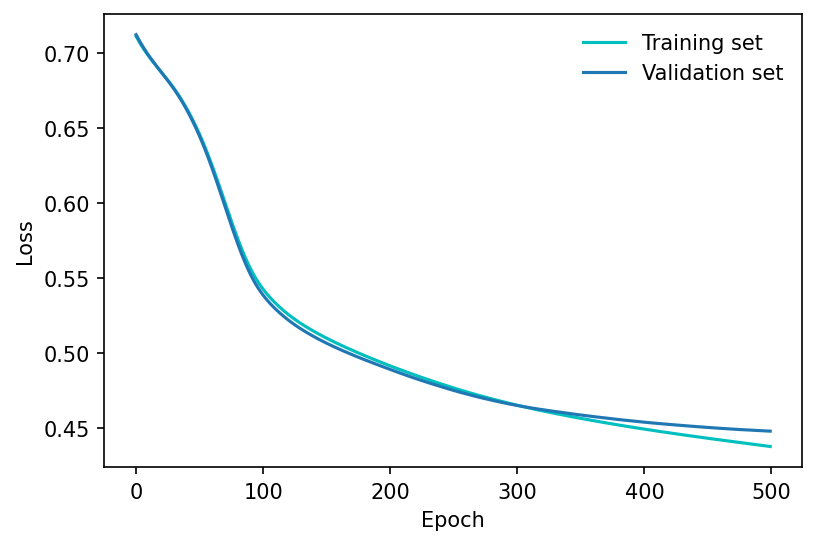

In [8]:
acc = dnn.fit (X.astype(np.float32), Y.astype(np.float32), X_val.astype(np.float32), Y_val.astype(np.float32))

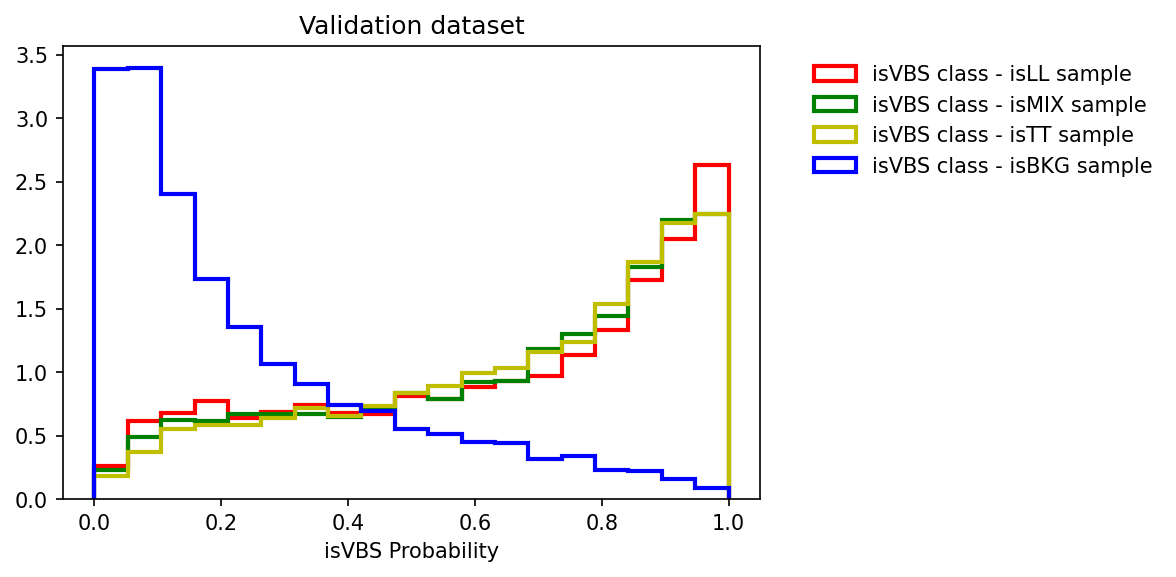

In [9]:
Y_predict_train = dnn.predict_proba(X)
Y_predict_val = dnn.predict_proba(X_val)

axis = np.linspace(0,1,20)

targets = ['isLL', 'isMIX', 'isTT', 'isBKG']
predictions = ['isVBS']
colors = ['r', 'g', 'y', 'b']
 
Y_targets = {}
Y_predictions = {}

for target in targets:
    #Y_targets[target] = dnn.predict_proba( df_val[ df_val[target]==1 ].values[:,0:NDIM] )
    if target != 'isBKG':
        Y_targets[target] = dnn.predict_proba( df[ df[target]==1 ].values[:,0:NDIM] )
    else:
        Y_targets[target] = dnn.predict_proba( df_val[ df_val[target]==1 ].values[:,0:NDIM] )
    Y_predictions[target] = {}
    for iprediction, prediction in enumerate(predictions):
        Y_predictions[target][prediction] = Y_targets[target][:,iprediction]

for prediction in predictions:
    for target, mycolor in zip(targets, colors):
        plt.hist(Y_predictions[target][prediction].numpy(), bins = axis, label = prediction + ' class - ' + target + ' sample', histtype='step', color=mycolor,  density=True, linewidth=2 )
    plt.title('Validation dataset')
    plt.xlabel(prediction + ' Probability')
    plt.legend(frameon=False, bbox_to_anchor=(1.05, 1.))
    #plt.yscale('log')
    plt.show()

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
#from matplotlib.backends.backend_pdf import PdfPages

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize = 16)
    plt.yticks(tick_marks, classes, fontsize = 16)

    thresh = cm.max() / 1.2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",fontsize=10)

    plt.xlabel("Predicted label", fontsize=16)
    plt.ylabel("True label", fontsize=16)

    
    plt.tight_layout()

In [11]:
from sklearn.metrics import accuracy_score
from scipy.stats import ks_2samp, anderson_ksamp

X = df_val.values[:,0:NDIM]
Y_true = df_val[['isVBS', 'isBKG']].values
Y_pred = dnn.predict_proba(X)

# The classifier categorical accuracy is a good and simple metrics to evaluate the overall classification performance
Y_true_max = np.argmax(Y_true, axis=1)
Y_pred_max = np.argmax(Y_pred, axis=1)
print("Classifier categorical accuracy = ", accuracy_score(Y_true_max, Y_pred_max))

Classifier categorical accuracy =  0.791389169189371


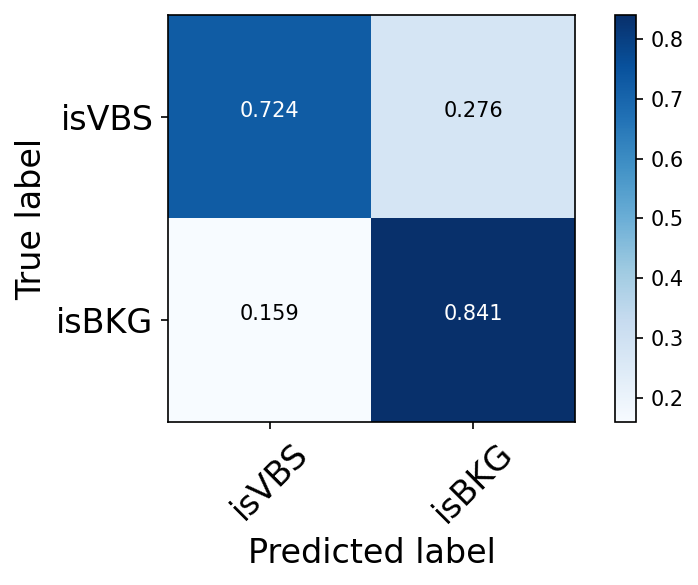

In [12]:
C = confusion_matrix(Y_true_max, Y_pred_max, normalize="true")
C = np.around(C, decimals=3)

plt.figure()
plot_confusion_matrix(C, classes=['isVBS', 'isBKG'], title='')
plt.show(1) 

In [13]:
X    = df.values[:,0:NDIM]
print(len(dnn.predict_proba(X)[...,0]))
df['DNN_SigVsBkg'] = dnn.predict_proba(X)[...,0].numpy().tolist()

107049


In [14]:
print(len(df))
print(len(df[(df['DNN_SigVsBkg'] > 0.5) & (df['isBKG'] == 1)]))
print(len(df[(df['DNN_SigVsBkg'] > 0.5) & (df['isLL'] == 1)]))
print(len(df[(df['DNN_SigVsBkg'] > 0.5) & (df['isMIX'] == 1)]))
print(len(df[(df['DNN_SigVsBkg'] > 0.5) & (df['isTT'] == 1)]))

df_other = df[((df['isTT'] + df['isMIX'] + df['isLL']) == 1) & (df['DNN_SigVsBkg'] > 0.5)]

df_notLL = df_other[df_other['notLL'] == 1].sample(n=int(len(df_other[df_other['notLL'] == 1])/2))
df_notTT= df_other[df_other['notTT'] == 1].sample(n=int(len(df_other[df_other['notTT'] == 1])/2))

df_LL = pd.concat([df_notLL, df_other[df_other['isLL'] == 1]])
df_TT = pd.concat([df_notTT, df_other[df_other['isTT'] == 1]])

107049
6685
7252
7494
7659


In [15]:
df_LL

,CleanJet_eta_1,CleanJet_eta_2,CleanJet_phi_1,CleanJet_phi_2,CleanJet_pt_1,CleanJet_pt_2,Lepton_eta_1,Lepton_eta_2,Lepton_phi_1,Lepton_phi_2,Lepton_pt_1,Lepton_pt_2,Rpt,Zepp_l1,Zepp_l2,Zepp_ll,detajj,detall,dphijj,dphilep1jet1,dphilep1jet2,dphilep1jj,dphilep2jet1,dphilep2jet2,dphilep2jj,dphill,dphilljet,dphilljetjet,dphillmet,dphilmet1,dphilmet2,dr_l1j1,dr_l1j2,dr_l2j1,dr_l2j2,drll,ht,m2ljj30,mT2,mTi,m_l1j1,m_l1j2,m_l2j1,m_l2j2,mcoll,mcollWW,mjj,mll,mtw1,mtw2,phi_miss,proxyW_l1,proxyW_l2,pt_miss,ptll,recoil,yll,isLL,isMIX,isTT,isBKG,isVBS,notLL,notTT,DNN_SigVsBkg
95287,1.328369,-1.594727,1.441162,-1.456543,162.607162,120.488663,0.274658,0.548828,-0.834473,-3.101562,198.281464,47.078770,0.476454,0.407837,0.682007,0.544922,2.923096,0.274170,2.897705,2.275635,0.622070,1.708540,1.740461,1.645020,2.307556,2.267090,2.487306,1.920210,2.687013,2.475342,1.540754,2.507752,1.970170,4.609125,2.702021,2.283608,777.331421,880.047058,142.949249,295.647797,382.291809,346.594055,152.487076,223.929306,154.716919,231.023499,636.151917,177.059692,218.821976,78.574486,1.640869,221.134796,84.598373,67.601021,171.923264,115.081291,0.327592,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.503138
77974,3.771973,-3.089355,2.354004,-0.031876,200.344406,95.407654,-1.068359,0.903076,-0.018143,-0.521240,31.126511,27.263346,0.044397,-1.409668,0.561768,0.423950,6.861328,1.971436,2.385880,2.372147,0.013733,1.908639,2.875244,0.489365,2.411736,0.503098,2.606694,2.143186,1.558872,1.793419,1.290322,5.390352,2.021043,4.061723,4.022311,2.034617,540.696533,4397.697266,95.016129,180.112732,893.539062,130.669907,327.951813,369.609680,35.403362,184.167496,4275.126953,68.739487,108.702469,78.301338,-1.811562,133.738174,99.144241,155.481201,56.560390,166.081924,-0.132670,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.984269
75315,-2.762695,3.525391,1.964844,-1.361572,138.733185,96.030190,-0.015720,1.701904,-1.927246,1.908203,82.965324,62.858166,0.391445,-0.397068,1.320557,0.461744,6.288086,1.717625,2.956769,2.391095,0.565674,2.012295,0.056641,3.013410,0.435442,2.447736,1.531576,1.152775,2.426029,1.566509,2.268940,4.763846,3.586008,4.464959,3.743866,2.990259,532.947693,2912.636475,83.888092,302.564697,444.021088,511.765472,860.501892,224.858337,58.932877,180.797318,2682.520020,194.959106,121.189957,135.495209,-0.360737,121.197479,197.097733,88.893990,53.064941,59.981125,0.746876,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.952516
92853,1.161621,-1.921631,-2.281738,0.161957,217.082565,179.486450,0.632202,-0.745361,2.378906,-1.788330,198.747284,24.315416,0.124030,1.012207,-0.365356,0.323425,3.083252,1.377563,2.443695,1.622541,2.216949,2.589491,0.493408,1.950287,0.473542,2.115949,1.511306,2.478256,1.360345,1.249110,2.918126,4.690618,3.381853,1.969780,2.277549,2.524861,735.062805,1262.091797,36.339836,220.825027,322.310760,710.490601,165.908981,138.096008,167.204834,266.897614,955.918518,159.352142,116.991280,69.545174,1.129796,133.498199,74.490395,50.353016,187.296082,203.851700,0.449648,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.874979
78042,3.194336,-2.841309,1.943848,-1.028320,79.089081,49.343750,-1.241211,1.430420,-0.192841,1.093018,47.673553,25.907171,0.316482,-1.417725,1.253906,0.081909,6.035645,2.671631,2.972168,2.136688,0.835480,1.869976,0.850830,2.121338,0.584118,1.285858,1.711833,1.445121,2.551544,2.976399,1.690541,4.923364,1.805087,1.958395,4.769459,2.964969,260.039124,1445.894043,50.770462,200.213638,567.879639,94.769951,98.890182,304.881989,50.347630,169.968628,1280.429077,131.357376,104.832367,58.014801,2.783559,125.807793,83.684792,58.025581,60.318409,34.479923,-0.168885,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.734832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74928,-1.692627,2.756348,-1.391602,2.118164,289.085754,201.629471,0.288513,1.422607,0.209625,1.295898,58.517097,38.734200,0.038886,-0.243347,0.890747,0.323700,

In [16]:
for col in df.columns:
    df_LL[col] = np.hstack(df_LL[col])
    df_TT[col] = np.hstack(df_TT[col])
'''
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df = shuffle(df)
'''
# Perform the splitting and define training and validation datasets
msk_LL = np.random.rand(len(df_LL)) < 0.8
msk_TT = np.random.rand(len(df_TT)) < 0.8

df_train_LL = df_LL[msk_LL]
df_train_TT = df_TT[msk_TT]
df_val_LL   = df_LL[~msk_LL]
df_val_TT   = df_TT[~msk_TT]

X_LL = df_train_LL.values[:,0:NDIM]
Y_LL = df_train_LL[['isLL', 'notLL']].values
#Y_LL = df_train_LL[['isLL']].values
X_val_LL = df_val_LL.values[:,0:NDIM]
Y_val_LL = df_val_LL[['isLL', 'notLL']].values
#Y_val_LL = df_val_LL[['isLL']].values

X_TT = df_train_TT.values[:,0:NDIM]
Y_TT = df_train_TT[['isTT', 'notTT']].values
#Y_TT = df_train_TT[['isTT']].values
X_val_TT = df_val_TT.values[:,0:NDIM]
Y_val_TT = df_val_TT[['isTT', 'notTT']].values
#Y_val_TT = df_val_TT[['isTT']].values

#X_val = df_val.values[:,0:NDIM+1]
#Y_val = df_val.values[:,NDIM+1:NDIM+1+nclasses] # isLL, isMIX, isTT, isBKG
print(X_LL,Y_LL)

[[ 1.32836914e+00 -1.59472656e+00  1.44116211e+00 ...  1.71923264e+02
   1.15081291e+02  3.27592015e-01]
 [ 3.77197266e+00 -3.08935547e+00  2.35400391e+00 ...  5.65603905e+01
   1.66081924e+02 -1.32670388e-01]
 [ 1.16162109e+00 -1.92163086e+00 -2.28173828e+00 ...  1.87296082e+02
   2.03851700e+02  4.49648350e-01]
 ...
 [-3.28027344e+00 -2.43911743e-02  3.03369141e+00 ...  5.40148201e+01
   4.63864403e+01 -2.36652255e-01]
 [-4.31213379e-01  3.22705078e+00 -3.83239746e-01 ...  1.34767197e+02
   1.40930145e+02  9.76971686e-01]
 [-4.11230469e+00  4.23632812e+00 -9.92797852e-01 ...  1.57223877e+02
   5.50639915e+01  5.37192166e-01]] [[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [32]:
dnnLL = SimpleNeuralNetwork(220, learning_rate=0.0001, N_NODES=50, n_layers=8, n_features=X_LL.shape[1], n_outputsC=2)
dnnLL.save_weights("LLvsOther_SF_RDF")

In [30]:
print(X_LL.shape, Y_LL.shape)

(11844, 57) (11844, 2)


100%|██████████| 220/220 [00:05<00:00, 37.83it/s]


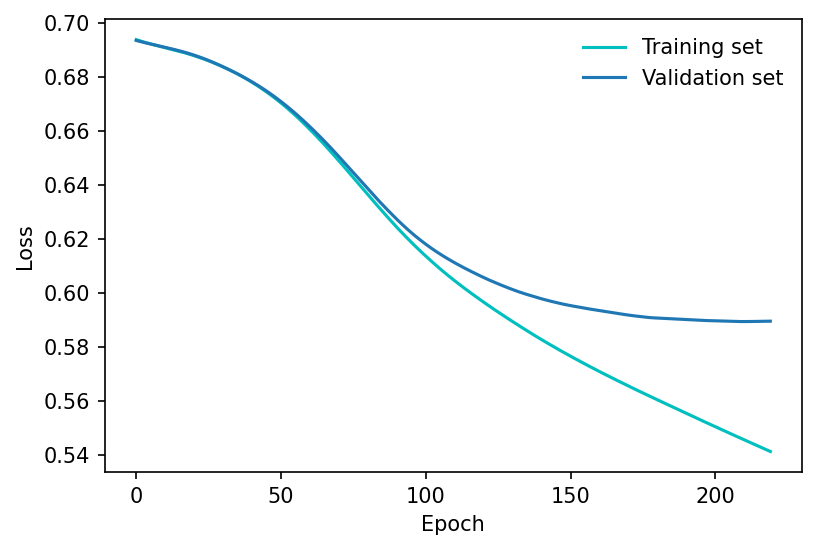

In [31]:
acc = dnnLL.fit (X_LL.astype(np.float32), Y_LL.astype(np.float32), X_val_LL.astype(np.float32), Y_val_LL.astype(np.float32))

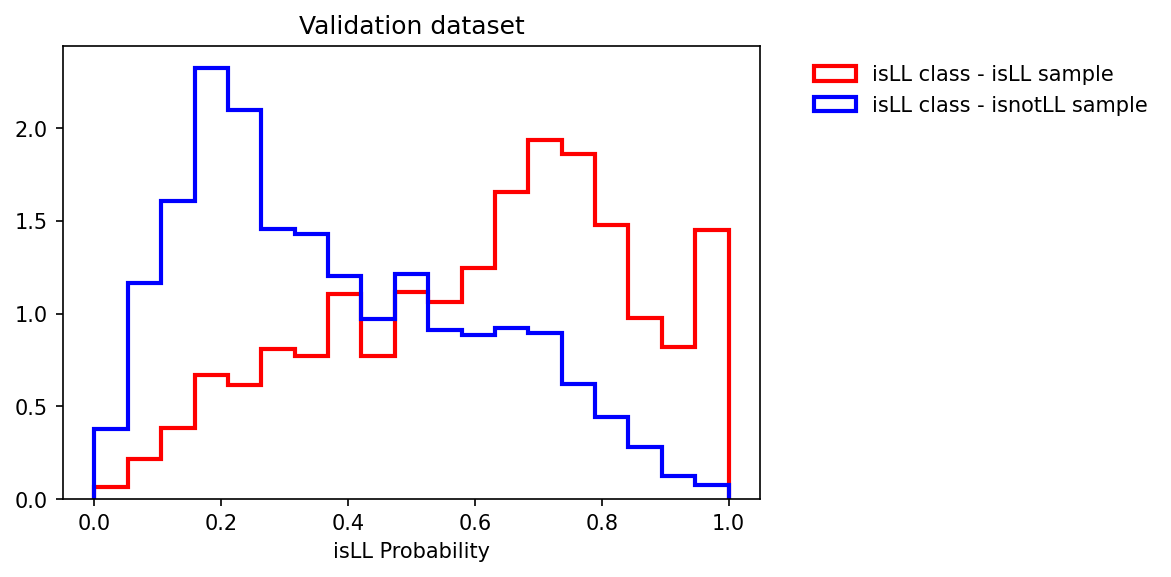

In [ ]:
Y_predict_train_LL = dnnLL.predict_proba(X_LL)
Y_predict_val_LL = dnnLL.predict_proba(X_val_LL)

axis = np.linspace(0,1,20)

plt.hist(dnnLL.predict_proba( df_val_LL[ df_val_LL['isLL']==1 ].values[:,0:NDIM] ).numpy()[...,0], bins = axis, label = 'isLL class - isLL sample', histtype='step', color='r',  density=True, linewidth=2 )
plt.hist(dnnLL.predict_proba( df_val_LL[ df_val_LL['isLL']==0 ].values[:,0:NDIM] ).numpy()[...,0], bins = axis, label = 'isLL class - isnotLL sample', histtype='step', color='b',  density=True, linewidth=2 )
plt.title('Validation dataset')
plt.xlabel('isLL Probability')
plt.legend(frameon=False, bbox_to_anchor=(1.05, 1.))
#plt.yscale('log')
plt.show()

In [80]:
from sklearn.metrics import accuracy_score
from scipy.stats import ks_2samp, anderson_ksamp

X_LL = df_val_LL.values[:,0:NDIM]
Y_true_LL = df_val_LL[['isLL', 'notLL']].values
Y_pred_LL = dnnLL.predict_proba(X_LL)
# mask = Y_pred_LL[:,0] > 0.5
# Y_pred_LL = Y_pred_LL[mask]
# Y_true_LL = Y_true_LL[mask]

# The classifier categorical accuracy is a good and simple metrics to evaluate the overall classification performance
Y_true_max_LL = np.argmax(Y_true_LL, axis=1)
Y_pred_max_LL = np.argmax(Y_pred_LL, axis=1)
print("Classifier categorical accuracy = ", accuracy_score(Y_true_max_LL, Y_pred_max_LL))

Classifier categorical accuracy =  0.6926943699731903


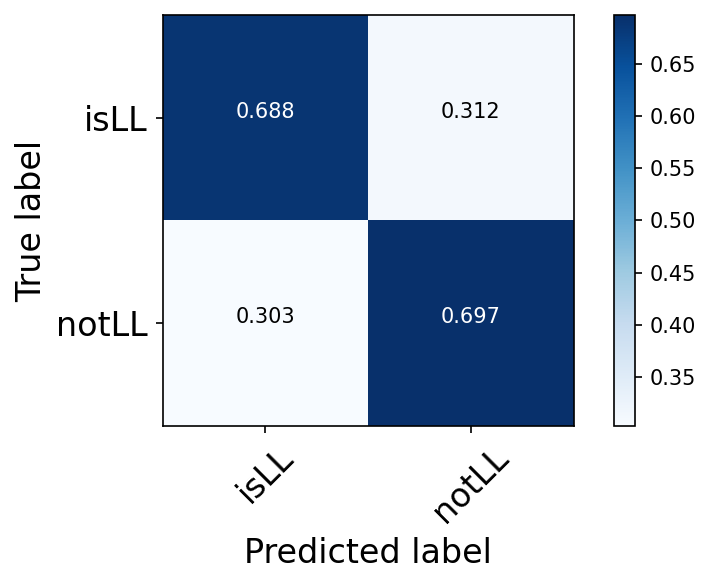

In [81]:
C = confusion_matrix(Y_true_max_LL, Y_pred_max_LL, normalize="true")
C = np.around(C, decimals=3)

plt.figure()
plot_confusion_matrix(C, classes=['isLL', 'notLL'], title='')
plt.show(1) 

In [82]:
dnnTT = SimpleNeuralNetwork(210, learning_rate=0.0001, N_NODES=50, n_layers=8, n_features=X_TT.shape[1], n_outputsC=2)
dnnTT.save_weights("TTvsOther_SF_RDF")

100%|██████████| 210/210 [00:05<00:00, 36.85it/s]


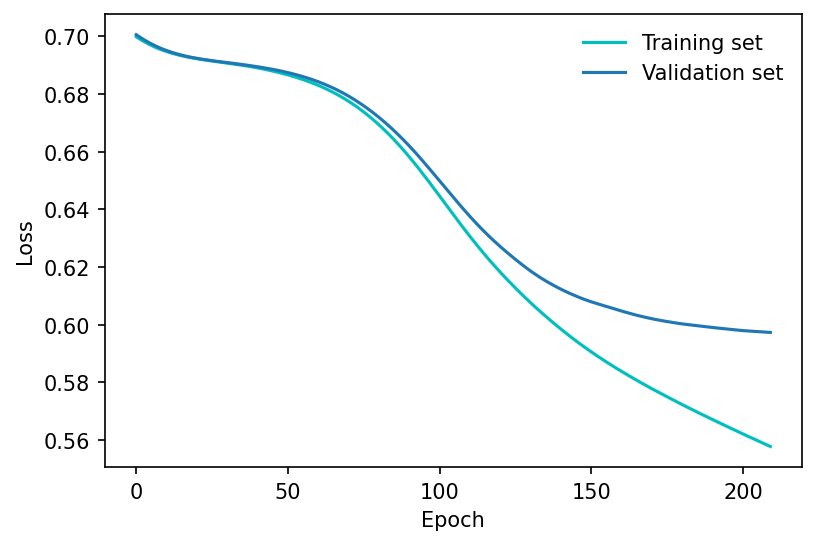

In [83]:
acc = dnnTT.fit (X_TT.astype(np.float32), Y_TT.astype(np.float32), X_val_TT.astype(np.float32), Y_val_TT.astype(np.float32))

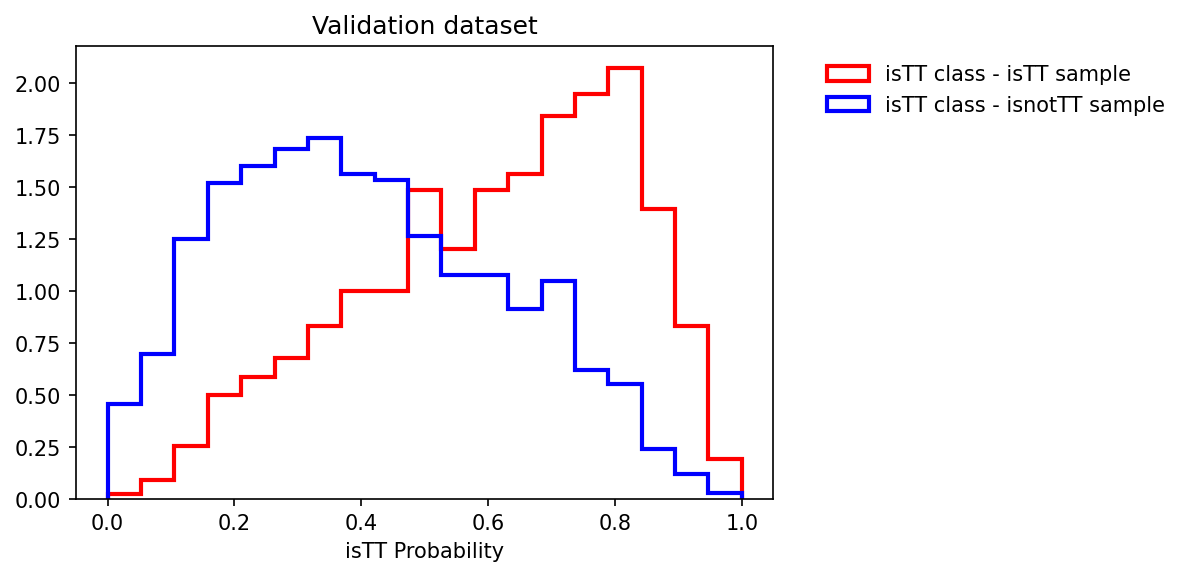

In [84]:
Y_predict_train_TT = dnnTT.predict_proba(X_TT)
Y_predict_val_TT = dnnTT.predict_proba(X_val_TT)

axis = np.linspace(0,1,20)

plt.hist(dnnTT.predict_proba( df_val_TT[ df_val_TT['isTT']==1 ].values[:,0:NDIM] ).numpy()[...,0], bins = axis, label = 'isTT class - isTT sample', histtype='step', color='r',  density=True, linewidth=2 )
plt.hist(dnnTT.predict_proba( df_val_TT[ df_val_TT['isTT']==0 ].values[:,0:NDIM] ).numpy()[...,0], bins = axis, label = 'isTT class - isnotTT sample', histtype='step', color='b',  density=True, linewidth=2 )
plt.title('Validation dataset')
plt.xlabel('isTT Probability')
plt.legend(frameon=False, bbox_to_anchor=(1.05, 1.))
#plt.yscale('log')
plt.show()

In [85]:
from sklearn.metrics import accuracy_score
from scipy.stats import ks_2samp, anderson_ksamp

X_TT = df_val_TT.values[:,0:NDIM]
Y_true_TT = df_val_TT[['isTT', 'notTT']].values
Y_pred_TT = dnnTT.predict_proba(X_TT)

# The classifier categorical accuracy is a good and simple metrics to evaluate the overall classification performance
Y_true_max_TT = np.argmax(Y_true_TT, axis=1)
Y_pred_max_TT = np.argmax(Y_pred_TT, axis=1)
print("Classifier categorical accuracy = ", accuracy_score(Y_true_max_TT, Y_pred_max_TT))

Classifier categorical accuracy =  0.6876295784381479


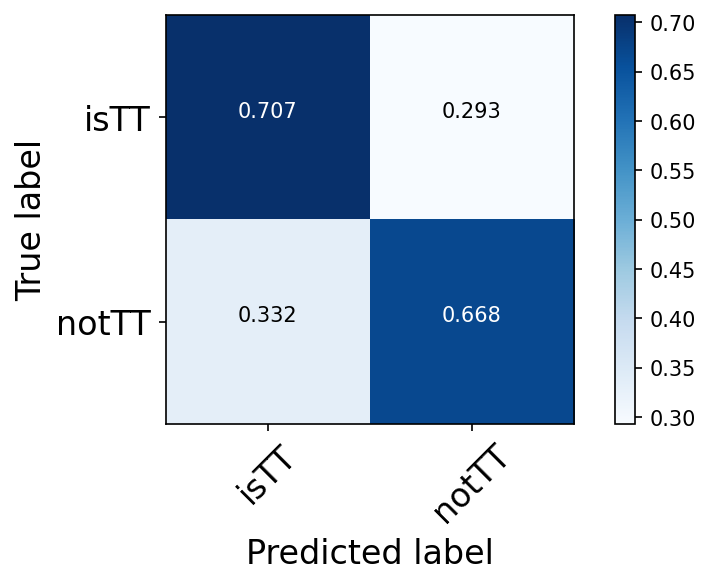

In [86]:
C = confusion_matrix(Y_true_max_TT, Y_pred_max_TT, normalize="true")
C = np.around(C, decimals=3)

plt.figure()
plot_confusion_matrix(C, classes=['isTT', 'notTT'], title='')
plt.show(1) 

In [87]:
print(len(dnnLL.predict_proba(X_val_LL)[...,0]))
print(len(dnnTT.predict_proba(X_val_LL)[...,0]))
df_val_LL['DNN_LL'] = dnnLL.predict_proba(X_val_LL)[...,0].numpy().tolist()
df_val_LL['DNN_TT'] = dnnTT.predict_proba(X_val_LL)[...,0].numpy().tolist()
df_val_bkg = df[(df['DNN_SigVsBkg'] > 0.5) & (df['isBKG'] == 1)]
X_val_bkg = df_val_bkg.values[:,0:NDIM]
df_val_bkg['DNN_LL'] = dnnLL.predict_proba(X_val_bkg)[...,0].numpy().tolist()
df_val_bkg['DNN_TT'] = dnnTT.predict_proba(X_val_bkg)[...,0].numpy().tolist()
print(df_val_LL)
print(df_val_bkg)

2984
2984
       CleanJet_eta_1  CleanJet_eta_2  CleanJet_phi_1  CleanJet_phi_2  \
75315       -2.762695        3.525391        1.964844       -1.361572   
86493       -2.440430        2.694824       -1.389648       -2.027832   
79866       -2.802734        2.488281       -0.753418        1.252686   
93924       -2.392090        2.885742        0.860962       -3.034180   
91785        2.337891       -1.315430        0.263550        3.041992   
...               ...             ...             ...             ...   
74901        4.357422       -2.615234        2.487793       -2.766113   
74905       -4.313477        3.495605       -1.022461       -2.173828   
74913        3.467773       -4.274414        0.874146       -0.325317   
74920       -2.466309        1.682617       -0.662354        2.291016   
74928       -1.692627        2.756348       -1.391602        2.118164   

       CleanJet_pt_1  CleanJet_pt_2  Lepton_eta_1  Lepton_eta_2  Lepton_phi_1  \
75315     138.733185      96.030

/tmp/ipykernel_256/3038950175.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val_LL['DNN_LL'] = dnnLL.predict_proba(X_val_LL)[...,0].numpy().tolist()
/tmp/ipykernel_256/3038950175.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val_LL['DNN_TT'] = dnnTT.predict_proba(X_val_LL)[...,0].numpy().tolist()
/tmp/ipykernel_256/3038950175.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

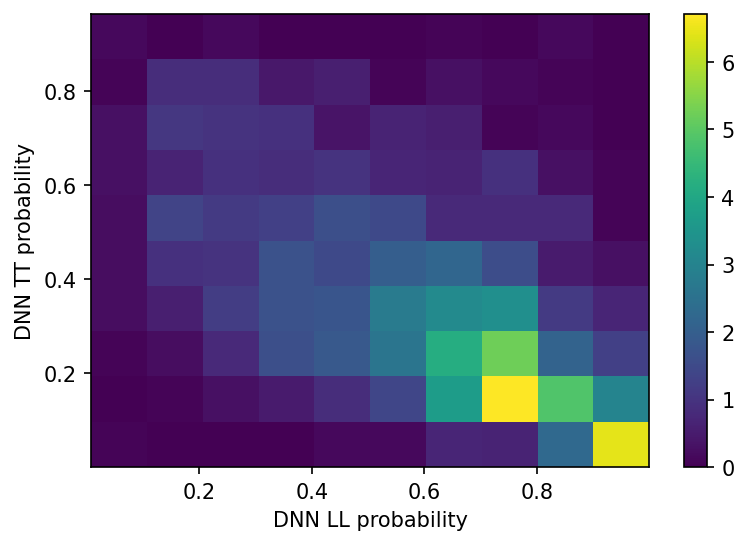

In [88]:
LL = df_val_LL[df_val_LL['isLL'] == 1]
mix = df_val_LL[df_val_LL['isMIX'] == 1]
TT = df_val_LL[df_val_LL['isTT'] == 1]

fig, ax = plt.subplots()
h_isLL = ax.hist2d(LL['DNN_LL'].values, LL['DNN_TT'].values, density=True)
fig.colorbar(h_isLL[3], ax=ax)
plt.ylabel('DNN TT probability')
plt.xlabel('DNN LL probability')
plt.show()

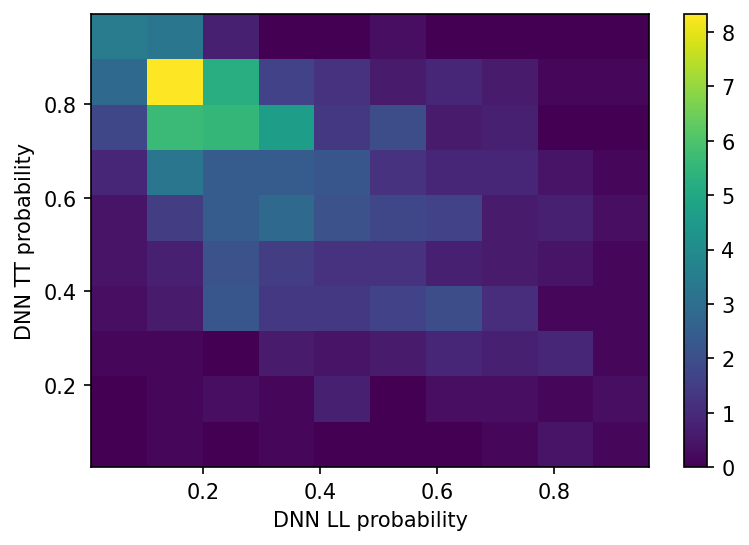

In [89]:
fig, ax = plt.subplots()
h_isTT = ax.hist2d(TT['DNN_LL'].values, TT['DNN_TT'].values, density=True)
fig.colorbar(h_isTT[3], ax=ax)
plt.ylabel('DNN TT probability')
plt.xlabel('DNN LL probability')
plt.show()

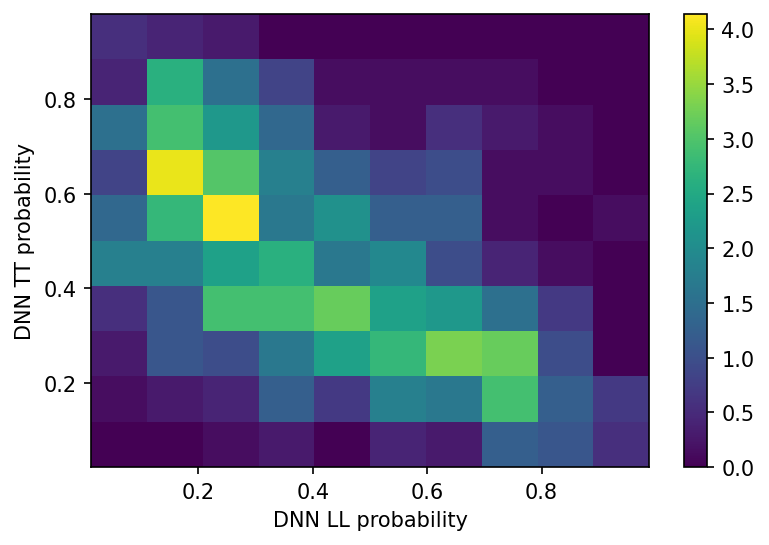

In [90]:
fig, ax = plt.subplots()
h_isMIX = ax.hist2d(mix['DNN_LL'].values, mix['DNN_TT'].values, density=True)
fig.colorbar(h_isMIX[3], ax=ax)
plt.ylabel('DNN TT probability')
plt.xlabel('DNN LL probability')
plt.show()

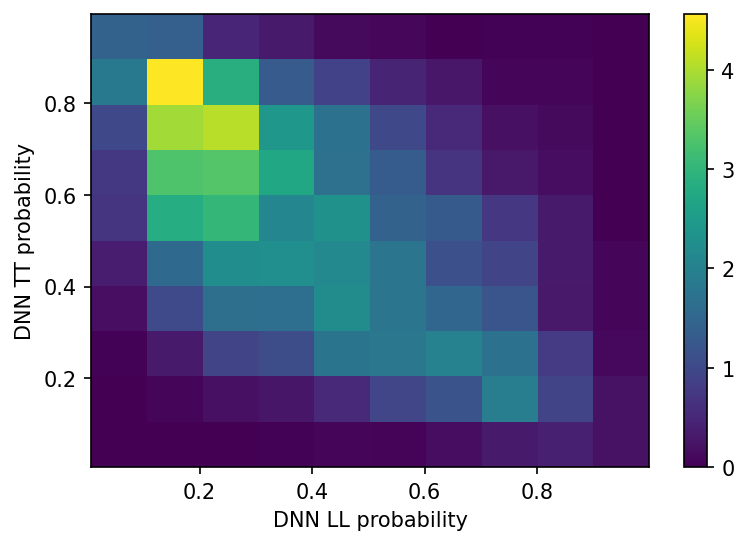

In [91]:
fig, ax = plt.subplots()
h_isBKG = ax.hist2d(df_val_bkg['DNN_LL'].values, df_val_bkg['DNN_TT'].values, density=True)
fig.colorbar(h_isBKG[3], ax=ax)
plt.ylabel('DNN TT probability')
plt.xlabel('DNN LL probability')
plt.show()

/tmp/ipykernel_256/3595125263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val_TT['DNN_LL'] = dnnLL.predict_proba(X_val_TT)[...,0].numpy().tolist()
/tmp/ipykernel_256/3595125263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val_TT['DNN_TT'] = dnnTT.predict_proba(X_val_TT)[...,0].numpy().tolist()


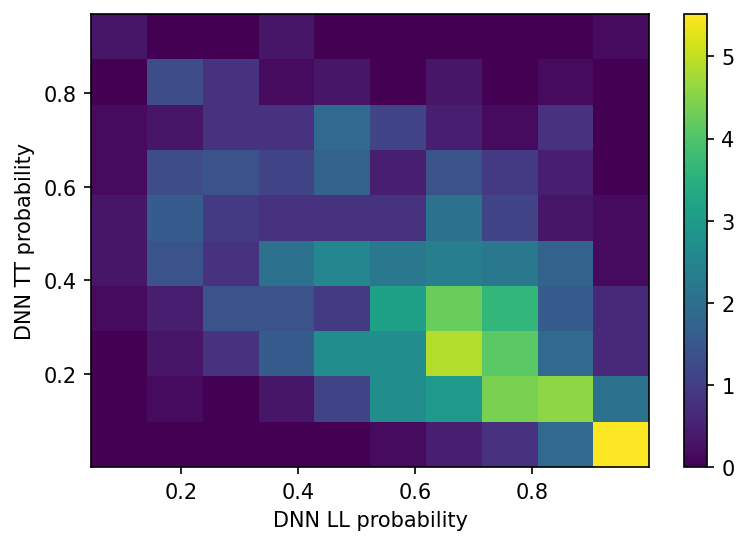

In [92]:
df_val_TT['DNN_LL'] = dnnLL.predict_proba(X_val_TT)[...,0].numpy().tolist()
df_val_TT['DNN_TT'] = dnnTT.predict_proba(X_val_TT)[...,0].numpy().tolist()

LL = df_val_TT[df_val_TT['isLL'] == 1]
mix = df_val_TT[df_val_TT['isMIX'] == 1]
TT = df_val_TT[df_val_TT['isTT'] == 1]

fig, ax = plt.subplots()
h_isLL = ax.hist2d(LL['DNN_LL'].values, LL['DNN_TT'].values, density=True)
fig.colorbar(h_isLL[3], ax=ax)
plt.ylabel('DNN TT probability')
plt.xlabel('DNN LL probability')
plt.show()

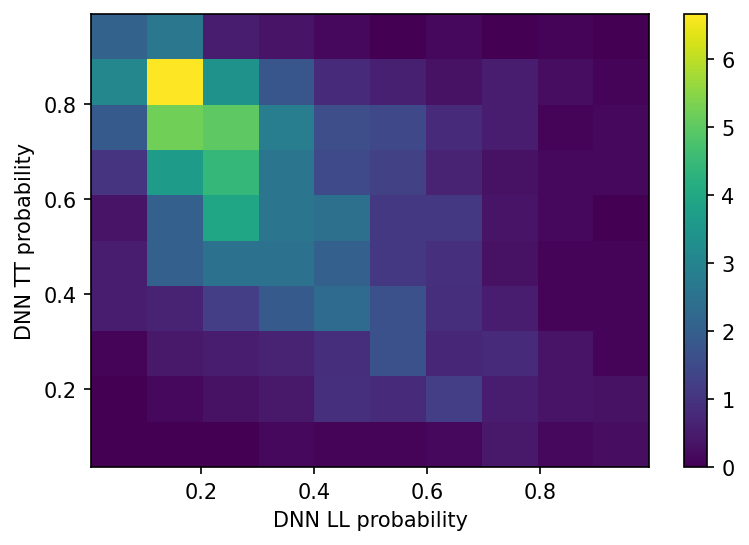

In [93]:
fig, ax = plt.subplots()
h_isTT = ax.hist2d(TT['DNN_LL'].values, TT['DNN_TT'].values, density=True)
fig.colorbar(h_isTT[3], ax=ax)
plt.ylabel('DNN TT probability')
plt.xlabel('DNN LL probability')
plt.show()

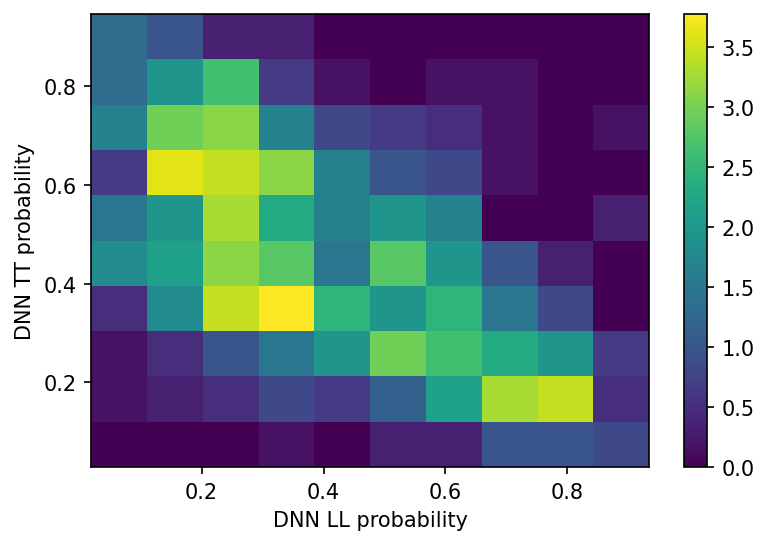

In [94]:
fig, ax = plt.subplots()
h_isMIX = ax.hist2d(mix['DNN_LL'].values, mix['DNN_TT'].values, density=True)
fig.colorbar(h_isMIX[3], ax=ax)
plt.ylabel('DNN TT probability')
plt.xlabel('DNN LL probability')
plt.show()

In [95]:
with open('generated_code_dnn_SigVsBkg_SF.h', 'w') as f:


    print ("""
    // Select all (Ctrl+A), Copy (Ctrl+C), paste to an empty text file (Ctrl+V) and save that file as 'generated_code.h'
    // 
    // Auto-generated header file. Assumes img to be a floating point array
    // of 64 elements (corresponding to an 8x8 b&w image)

    #include <math.h>

    float norma_VBS;
    """, file=f)
    
    iLayer_tmp=-1

    for iLayer, layer in enumerate(dnn.model1.layers):
      print(type(layer))
#       if type(layer) is not Dropout and type(layer) is not Input :
      if type(layer) is Dense:
        kernel, bias = layer.get_weights()
        iLayer_tmp+=1
        print ("inline float activation_VBS_%d (float x, float n) " % iLayer_tmp, file=f);
        activation =  layer.get_config()['activation'] 
        if activation == 'sigmoid':
          print ("{ return 1./(1 + exp(-x)); }", file=f)
        elif activation == 'tanh':
          print ("{ return tanh(x);}")
        elif activation == 'relu':
          print ("{ return x > 0 ? x : 0;}", file=f)
        elif activation == 'linear':
          print ("{ return x;}")
        elif activation == 'softmax':
          print ("{ return exp(x)/n;  }", file=f)
        else:
          raise KeyError ("Unexpected activation %s"%activation)
      
    iLayer_tmp=-1

    
    print ("""
    float guess_VBS (const float *img, int flag)
    {
    """, file=f)

    max_out = 100
    for iLayer, layer in enumerate(dnn.model1.layers):
      if type(layer) is Dense:
        iLayer_tmp+=1
        print ("  // Declare the arrays in the stack", file=f)
        kernel, bias = layer.get_weights()
        
        print (type (dnn.means))
        print (type(bias))
        
         
        max_out = max(kernel.shape[1], max_out)
        #print ("  //",bias.shape)
        kernel_values = "{%s}"%(',\n   '.join(["{%s}"%(','.join(["%18.13f"%x for x in row])) for row in kernel]))
        bias_values   = "{%s}"% ( ",".join(["%18.13f"%x for x in bias]))
        print ("  const float kernel_%d[%d][%d] = \n  %s;" % (iLayer_tmp, kernel.shape[0], kernel.shape[1],kernel_values), file=f)
        print ("  const float bias_%d[%d] = %s;" % (iLayer_tmp, bias.shape[0], bias_values), file=f)
      
    print ("  float buffer_in[%d];" % max_out, file=f)
    print ("  float buffer_out[%d];" % max_out, file=f)

    print ("  unsigned int i,j,c; ", file=f)
    

    mean_values = "{%s}"% ( ",".join(["%18.13f"%x for x in dnn.means]))
    sigma_values = "{%s}"% ( ",".join(["%18.13f"%x for x in dnn.sigmas]))
    

    print (" float mean[%d] = %s;" % (max_out, mean_values), file=f)
    print (" float sigma[%d] = %s;" % (max_out, sigma_values), file=f)

    print ("\n\n\n", file=f)
    print ("  // Load the input in the buffer", file=f)
    print ("  for (c = 0; c < 64; ++c) \n  buffer_in[c] = (img[c]-mean[c])/sigma[c];", file=f)



    iLayer_tmp=-1

    for iLayer, layer in enumerate(dnn.model1.layers):
      if type(layer) is Dense: 
        kernel, bias = layer.get_weights()
        iLayer_tmp+=1

        if iLayer != len(dnn.model1.layers)-1:
            
            
            print ( "  // Processing layer %i " % iLayer_tmp , file=f)
            print ( """
            for (c = 0; c < {n_out}; ++c ) 
              buffer_out[c] = bias_{iLayer_tmp}[c];

            for (c = 0; c < {n_out}; ++c )
              for (i = 0; i < {n_in}; ++i)
                buffer_out[c] += buffer_in[i] * kernel_{iLayer_tmp}[i][c];

            norma_VBS = 0;

            // Prepares for next layer 
            for (c = 0; c < {n_out}; ++c )
              buffer_in[c] = activation_VBS_{iLayer_tmp}(buffer_out[c], norma_VBS);


            """.format (
                n_in = kernel.shape[0],
                n_out = kernel.shape[1],
                iLayer_tmp = iLayer_tmp,
            ), file=f)
            
        else:
            
            print ( "  // Processing layer %i " % iLayer_tmp , file=f)
            print ( """
            for (c = 0; c < {n_out}; ++c ) 
              buffer_out[c] = bias_{iLayer_tmp}[c];

            for (c = 0; c < {n_out}; ++c )
              for (i = 0; i < {n_in}; ++i)
                buffer_out[c] += buffer_in[i] * kernel_{iLayer_tmp}[i][c];

            norma_VBS = 0;

            for(c=0;c<{n_out};++c)
              norma_VBS+=exp(buffer_out[c]);

            // Prepares for next layer 
            for (c = 0; c < {n_out}; ++c )
              buffer_in[c] = activation_VBS_{iLayer_tmp}(buffer_out[c], norma_VBS);


            """.format (
                n_in = kernel.shape[0],
                n_out = kernel.shape[1],
                iLayer_tmp = iLayer_tmp,
            ), file=f)
      
    last_kernel, last_bias = dnn.model1.layers[-1].get_weights()
    print ("""
      //i = 0;
      //for (c = 0; c < {n_out}; ++c)
      //  if (buffer_in[c] > buffer_in[i])
      //    i = c;
      
      if (flag==0) //vbf
        return buffer_in[0];
      else if (flag==1) //bkg
        return buffer_in[1];
         
      
      //return i;
    """.format(n_out = last_kernel.shape[1]), file=f)

    print ("}", file=f)

<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
with open('generated_code_dnn_SF_LLVsOther.h', 'w') as f:


    print ("""
    // Select all (Ctrl+A), Copy (Ctrl+C), paste to an empty text file (Ctrl+V) and save that file as 'generated_code.h'
    // 
    // Auto-generated header file. Assumes img to be a floating point array
    // of 64 elements (corresponding to an 8x8 b&w image)

    #include <math.h>

    float norma_LL;
    """, file=f)
    
    iLayer_tmp=-1

    for iLayer, layer in enumerate(dnnLL.model1.layers):
      print(type(layer))
#       if type(layer) is not Dropout and type(layer) is not Input :
      if type(layer) is Dense:
        kernel, bias = layer.get_weights()
        iLayer_tmp+=1
        print ("inline float activation_LL_%d (float x, float n) " % iLayer_tmp, file=f);
        activation =  layer.get_config()['activation'] 
        if activation == 'sigmoid':
          print ("{ return 1./(1 + exp(-x)); }", file=f)
        elif activation == 'tanh':
          print ("{ return tanh(x);}")
        elif activation == 'relu':
          print ("{ return x > 0 ? x : 0;}", file=f)
        elif activation == 'linear':
          print ("{ return x;}")
        elif activation == 'softmax':
          print ("{ return exp(x)/n;  }", file=f)
        else:
          raise KeyError ("Unexpected activation %s"%activation)
      
    iLayer_tmp=-1

    
    print ("""
    float guess_LL (const float *img, int flag)
    {
    """, file=f)

    max_out = 100
    for iLayer, layer in enumerate(dnnLL.model1.layers):
      if type(layer) is Dense:
        iLayer_tmp+=1
        print ("  // Declare the arrays in the stack", file=f)
        kernel, bias = layer.get_weights()
        
        print (type (dnnLL.means))
        print (type(bias))
        
         
        max_out = max(kernel.shape[1], max_out)
        #print ("  //",bias.shape)
        kernel_values = "{%s}"%(',\n   '.join(["{%s}"%(','.join(["%18.13f"%x for x in row])) for row in kernel]))
        bias_values   = "{%s}"% ( ",".join(["%18.13f"%x for x in bias]))
        print ("  const float kernel_%d[%d][%d] = \n  %s;" % (iLayer_tmp, kernel.shape[0], kernel.shape[1],kernel_values), file=f)
        print ("  const float bias_%d[%d] = %s;" % (iLayer_tmp, bias.shape[0], bias_values), file=f)
      
    print ("  float buffer_in[%d];" % max_out, file=f)
    print ("  float buffer_out[%d];" % max_out, file=f)

    print ("  unsigned int i,j,c; ", file=f)
    

    mean_values = "{%s}"% ( ",".join(["%18.13f"%x for x in dnnLL.means]))
    sigma_values = "{%s}"% ( ",".join(["%18.13f"%x for x in dnnLL.sigmas]))
    

    print (" float mean[%d] = %s;" % (max_out, mean_values), file=f)
    print (" float sigma[%d] = %s;" % (max_out, sigma_values), file=f)

    print ("\n\n\n", file=f)
    print ("  // Load the input in the buffer", file=f)
    print ("  for (c = 0; c < 64; ++c) \n  buffer_in[c] = (img[c]-mean[c])/sigma[c];", file=f)



    iLayer_tmp=-1

    for iLayer, layer in enumerate(dnnLL.model1.layers):
      if type(layer) is Dense: 
        kernel, bias = layer.get_weights()
        iLayer_tmp+=1

        if iLayer != len(dnnLL.model1.layers)-1:
            
            
            print ( "  // Processing layer %i " % iLayer_tmp , file=f)
            print ( """
            for (c = 0; c < {n_out}; ++c ) 
              buffer_out[c] = bias_{iLayer_tmp}[c];

            for (c = 0; c < {n_out}; ++c )
              for (i = 0; i < {n_in}; ++i)
                buffer_out[c] += buffer_in[i] * kernel_{iLayer_tmp}[i][c];

            norma_LL = 0;

            // Prepares for next layer 
            for (c = 0; c < {n_out}; ++c )
              buffer_in[c] = activation_LL_{iLayer_tmp}(buffer_out[c], norma_LL);


            """.format (
                n_in = kernel.shape[0],
                n_out = kernel.shape[1],
                iLayer_tmp = iLayer_tmp,
            ), file=f)
            
        else:
            
            print ( "  // Processing layer %i " % iLayer_tmp , file=f)
            print ( """
            for (c = 0; c < {n_out}; ++c ) 
              buffer_out[c] = bias_{iLayer_tmp}[c];

            for (c = 0; c < {n_out}; ++c )
              for (i = 0; i < {n_in}; ++i)
                buffer_out[c] += buffer_in[i] * kernel_{iLayer_tmp}[i][c];

            norma_LL = 0;

            for(c=0;c<{n_out};++c)
              norma_LL+=exp(buffer_out[c]);

            // Prepares for next layer 
            for (c = 0; c < {n_out}; ++c )
              buffer_in[c] = activation_LL{iLayer_tmp}(buffer_out[c], norma_LL);


            """.format (
                n_in = kernel.shape[0],
                n_out = kernel.shape[1],
                iLayer_tmp = iLayer_tmp,
            ), file=f)
      
    last_kernel, last_bias = dnnLL.model1.layers[-1].get_weights()
    print ("""
      //i = 0;
      //for (c = 0; c < {n_out}; ++c)
      //  if (buffer_in[c] > buffer_in[i])
      //    i = c;
      
      if (flag==0) //vbf
        return buffer_in[0];
      else if (flag==1) //bkg
        return buffer_in[1];
         
      
      //return i;
    """.format(n_out = last_kernel.shape[1]), file=f)

    print ("}", file=f)

<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [97]:
with open('generated_code_dnn_SF_TTVsOther.h', 'w') as f:


    print ("""
    // Select all (Ctrl+A), Copy (Ctrl+C), paste to an empty text file (Ctrl+V) and save that file as 'generated_code.h'
    // 
    // Auto-generated header file. Assumes img to be a floating point array
    // of 64 elements (corresponding to an 8x8 b&w image)

    #include <math.h>

    float norma_TT;
    """, file=f)
    
    iLayer_tmp=-1

    for iLayer, layer in enumerate(dnnTT.model1.layers):
      print(type(layer))
#       if type(layer) is not Dropout and type(layer) is not Input :
      if type(layer) is Dense:
        kernel, bias = layer.get_weights()
        iLayer_tmp+=1
        print ("inline float activation_TT_%d (float x, float n) " % iLayer_tmp, file=f);
        activation =  layer.get_config()['activation'] 
        if activation == 'sigmoid':
          print ("{ return 1./(1 + exp(-x)); }", file=f)
        elif activation == 'tanh':
          print ("{ return tanh(x);}")
        elif activation == 'relu':
          print ("{ return x > 0 ? x : 0;}", file=f)
        elif activation == 'linear':
          print ("{ return x;}")
        elif activation == 'softmax':
          print ("{ return exp(x)/n;  }", file=f)
        else:
          raise KeyError ("Unexpected activation %s"%activation)
      
    iLayer_tmp=-1

    
    print ("""
    float guess_TT (const float *img, int flag)
    {
    """, file=f)

    max_out = 100
    for iLayer, layer in enumerate(dnnTT.model1.layers):
      if type(layer) is Dense:
        iLayer_tmp+=1
        print ("  // Declare the arrays in the stack", file=f)
        kernel, bias = layer.get_weights()
        
        print (type (dnnTT.means))
        print (type(bias))
        
         
        max_out = max(kernel.shape[1], max_out)
        #print ("  //",bias.shape)
        kernel_values = "{%s}"%(',\n   '.join(["{%s}"%(','.join(["%18.13f"%x for x in row])) for row in kernel]))
        bias_values   = "{%s}"% ( ",".join(["%18.13f"%x for x in bias]))
        print ("  const float kernel_%d[%d][%d] = \n  %s;" % (iLayer_tmp, kernel.shape[0], kernel.shape[1],kernel_values), file=f)
        print ("  const float bias_%d[%d] = %s;" % (iLayer_tmp, bias.shape[0], bias_values), file=f)
      
    print ("  float buffer_in[%d];" % max_out, file=f)
    print ("  float buffer_out[%d];" % max_out, file=f)

    print ("  unsigned int i,j,c; ", file=f)
    

    mean_values = "{%s}"% ( ",".join(["%18.13f"%x for x in dnnTT.means]))
    sigma_values = "{%s}"% ( ",".join(["%18.13f"%x for x in dnnTT.sigmas]))
    

    print (" float mean[%d] = %s;" % (max_out, mean_values), file=f)
    print (" float sigma[%d] = %s;" % (max_out, sigma_values), file=f)

    print ("\n\n\n", file=f)
    print ("  // Load the input in the buffer", file=f)
    print ("  for (c = 0; c < 64; ++c) \n  buffer_in[c] = (img[c]-mean[c])/sigma[c];", file=f)



    iLayer_tmp=-1

    for iLayer, layer in enumerate(dnnTT.model1.layers):
      if type(layer) is Dense: 
        kernel, bias = layer.get_weights()
        iLayer_tmp+=1

        if iLayer != len(dnnTT.model1.layers)-1:
            
            
            print ( "  // Processing layer %i " % iLayer_tmp , file=f)
            print ( """
            for (c = 0; c < {n_out}; ++c ) 
              buffer_out[c] = bias_{iLayer_tmp}[c];

            for (c = 0; c < {n_out}; ++c )
              for (i = 0; i < {n_in}; ++i)
                buffer_out[c] += buffer_in[i] * kernel_{iLayer_tmp}[i][c];

            norma_TT = 0;

            // Prepares for next layer 
            for (c = 0; c < {n_out}; ++c )
              buffer_in[c] = activation_TT_{iLayer_tmp}(buffer_out[c], norma_TT);


            """.format (
                n_in = kernel.shape[0],
                n_out = kernel.shape[1],
                iLayer_tmp = iLayer_tmp,
            ), file=f)
            
        else:
            
            print ( "  // Processing layer %i " % iLayer_tmp , file=f)
            print ( """
            for (c = 0; c < {n_out}; ++c ) 
              buffer_out[c] = bias_{iLayer_tmp}[c];

            for (c = 0; c < {n_out}; ++c )
              for (i = 0; i < {n_in}; ++i)
                buffer_out[c] += buffer_in[i] * kernel_{iLayer_tmp}[i][c];

            norma_TT = 0;

            for(c=0;c<{n_out};++c)
              norma_TT+=exp(buffer_out[c]);

            // Prepares for next layer 
            for (c = 0; c < {n_out}; ++c )
              buffer_in[c] = activation_TT_{iLayer_tmp}(buffer_out[c], norma_TT);


            """.format (
                n_in = kernel.shape[0],
                n_out = kernel.shape[1],
                iLayer_tmp = iLayer_tmp,
            ), file=f)
      
    last_kernel, last_bias = dnnTT.model1.layers[-1].get_weights()
    print ("""
      //i = 0;
      //for (c = 0; c < {n_out}; ++c)
      //  if (buffer_in[c] > buffer_in[i])
      //    i = c;
      
      if (flag==0) //vbf
        return buffer_in[0];
      else if (flag==1) //bkg
        return buffer_in[1];
         
      
      //return i;
    """.format(n_out = last_kernel.shape[1]), file=f)

    print ("}", file=f)

<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
